## MATH 6388: Statistical and Machine Learning

### Lecture 7: Dimensionality Reduction Techniques

### Instructor: Farhad Pourkamali 

#### Department of Mathematical and Statistical Sciences
#### University of Colorado Denver


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388/blob/main/Lecture7_DimReduction.ipynb)



### Motivation
<hr style="border:2px solid gray">

* **Reduced Complexity**: Dimensionality reduction simplifies the data set by reducing the number of features, making it easier to analyze and interpret



* **Computational Efficiency**: With fewer dimensions, the computational cost of algorithms and models decreases, leading to faster training and testing times

* **Noise Reduction**: Dimensionality reduction can help eliminate irrelevant features, reducing noise in the data and improving the performance of machine learning models

* **Improved Visualization**: Techniques like t-SNE (t-Distributed Stochastic Neighbor Embedding) can visualize high-dimensional data in lower dimensions, aiding in the identification of patterns and clusters

### Problem formulation
<hr style="border:2px solid gray">

* Our goal is to learn a mapping from the high-dimensional visible space $\mathbf{x}\in\mathbb{R}^D$ to a low-dimensional latent space $\mathbf{z}\in\mathbb{R}^L$, $L<D$

    * This mapping can be a parametric model $\mathbf{z}=f(\mathbf{x};\theta)$, which can be applied to any input 
    * Thus, it can be used as a preprocessing step for other kinds of learning algorithms
        * For example, learn a mapping from $\mathbf{x}$ to $\mathbf{z}$ and then train a logistic regression classifier in $\mathbb{R}^L$
        
    * The simplest and most widely used form of dimensionality reduction is Principal Components Analysis or PCA

### PCA 
<hr style="border:2px solid gray">

* The basic idea is to find a linear and orthogonal projection of the high dimensional
data in the following sense:

    * If we project or encode $\mathbf{x}$ to get $\mathbf{z}=\mathbf{W}^T\mathbf{x}$, and then unproject or decode $\mathbf{z}$ to get $\hat{\mathbf{x}}=\mathbf{W}\mathbf{z}$, then we want $\hat{\mathbf{x}}$ to be close to $\mathbf{x}$ in L2 norm or distance
    
* Thus, we can define the following reconstruction error or distortion:

$$J(\mathbf{W})=\frac{1}{N}\sum_{n=1}^N \|\mathbf{x}_n - \text{decode}\big(\text{encode}(\mathbf{x}_n;\mathbf{W});\mathbf{W}\big)\|_2^2$$


where the encode and decoding stages are both linear maps

* Centering the data matrix is a fundamental preprocessing step in PCA that helps ensure the first principal component describes the direction of maximum variance, rather than the direction of the mean

* Suppose $\mathbf{X}\in\mathbb{R}^{N\times D}$ is our data matrix. Define 

$$\bar{\mathbf{x}}=\frac{1}{N}\sum_{n=1}^N\mathbf{x}_n$$

* Let $\bar{\mathbf{X}}\in\mathbb{R}^{N\times D}$ be the matrix with $\bar{\mathbf{x}}$ in every row and find the centered data matrix 

$$\mathbf{X}_c=\mathbf{X} - \bar{\mathbf{X}}$$

* Some basics:
    * In linear algebra, the trace of a square matrix is the sum of its diagonal elements
    * If A and B are $m\times n$ and $n \times m$ real matrices, then $\text{tr}(\mathbf{A}\mathbf{B})=\text{tr}(\mathbf{B}\mathbf{A})$
    * Frobenius norm: $\|\mathbf{A}\|_F^2=\text{tr}(\mathbf{A}^T\mathbf{A})$

### Solving the optimization problem
<hr style="border:2px solid gray">

* Consider minimizing the loss function: 

\begin{align}
J(\mathbf{W})=& \|\mathbf{X}_c - \mathbf{X}_c \mathbf{W} \mathbf{W}^T\|_F^2 \\
=& \|\mathbf{X}_c\big(\mathbf{I} - \mathbf{W} \mathbf{W}^T\big)\|_F^2 \\
=& \text{tr}\big(\mathbf{X}_c\big(\mathbf{I} - \mathbf{W} \mathbf{W}^T\big)\big(\mathbf{I} - \mathbf{W} \mathbf{W}^T\big)\mathbf{X}_c^T\big)\\
=& \text{tr}\big(\mathbf{X}_c\big(\mathbf{I} - \mathbf{W} \mathbf{W}^T - \mathbf{W} \mathbf{W}^T +  \mathbf{W} \mathbf{W}^T \big)\mathbf{X}_c^T\big)\\
&= \text{tr}\big(\mathbf{X}_c\big(\mathbf{I} - \mathbf{W} \mathbf{W}^T \big)\mathbf{X}_c^T\big)\\
&= \text{tr}\big(\mathbf{X}_c\mathbf{X}_c^T\big) - \text{tr}\big(\mathbf{X}_c\mathbf{W} \mathbf{W}^T\mathbf{X}_c^T\big)\\
&= \text{tr}\big(\mathbf{X}_c\mathbf{X}_c^T\big) - \text{tr}\big(\mathbf{W}^T\mathbf{X}_c^T\mathbf{X}_c\mathbf{W} \big)
\end{align}

* Thus, this optimization problem is equivalent to the following trace maximization problem:

$$ \underset{\mathbf{W}\in\mathbb{R}^{D\times L}, \mathbf{W}^T\mathbf{W}=\mathbf{I}}{\operatorname{argmax}} \text{tr}\big(\mathbf{W}^T\mathbf{X}_c^T\mathbf{X}_c\mathbf{W} \big)$$

* Therefore, $\mathbf{W}^*=\mathbf{U}_L$, where $\mathbf{U}_L$ contains the $L$ eigenvectors with largest eigenvalues of $\mathbf{X}_c^T\mathbf{X}_c\in\mathbb{R}^{D\times D}$


* Scikit-learn implementation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    * Scikit-Learn’s PCA classes take care of centering the data


### PCA via SVD 
<hr style="border:2px solid gray">

* Consider the data matrix $\mathbf{X}_c\in\mathbb{R}^{N\times D}$

* The singular value decomposition of this matrix gives us: (assume $D<N$)

$$\mathbf{X}_c=\mathbf{U}\mathbf{S}{\mathbf{V}}^T=\begin{bmatrix}| & & |\\\mathbf{u}_1 & \ldots & \mathbf{u}_D\\ | & & |\end{bmatrix} \begin{bmatrix}s_1 & & \\
& \ddots & \\ & & s_D\end{bmatrix}\begin{bmatrix} - & \mathbf{v}_1^T & - \\ & \vdots & \\ - & \mathbf{v}_D^T & -\end{bmatrix}$$

* Thus, $\mathbf{X}_c^T\mathbf{X}_c=\mathbf{V}\mathbf{S}\mathbf{U}^T\mathbf{U}\mathbf{S}\mathbf{V}^T=\mathbf{V}\mathbf{S}^2\mathbf{V}^T$

* The right singular vectors of $\mathbf{X}_c$ are the eigenvectors of $\mathbf{X}_c^T\mathbf{X}_c$
    * Scikit-Learn’s PCA classes use SVD instead of eigenvalue decomposition

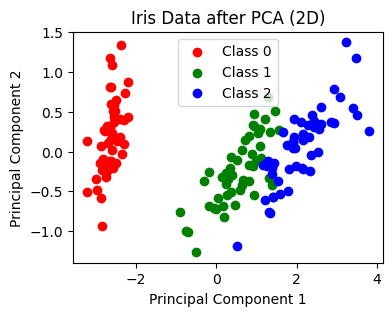

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA and reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data after PCA in 2D
plt.figure(figsize=(4, 3))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=f'Class {i}')

plt.title('Iris Data after PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [2]:
print(X.shape, X_pca.shape)

(150, 4) (150, 2)


In [3]:
# Each element in the array corresponds to the variance
# explained by a single principal component

print(pca.explained_variance_)

[4.22824171 0.24267075]


In [4]:
# How do we get these numbers? 

CovMatrix = np.sqrt(1/(len(X) - 1)) * (X - X.mean(axis=0))

u, s, v = np.linalg.svd(CovMatrix)

print(s**2)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [5]:
print(s**2/np.sum(s**2))

[0.92461872 0.05306648 0.01710261 0.00521218]


In [6]:
# Percentage of variance explained by each of the selected components

print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [7]:
# By projecting down to 2D, we lost what percentage of the variance? 

print(1 - pca.explained_variance_ratio_.sum())

0.022314793681205036


### t-distributed Stochastic Neighbor Embedding (t-SNE)
<hr style="border:2px solid gray">

* The main idea behind t-SNE is to map high-dimensional data points into a lower-dimensional space while preserving the pairwise similarities between points as much as possible

* The general math behind t-SNE involves defining probability distributions that represent similarities between data points in both the high-dimensional and low-dimensional spaces: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbcl

* **Similarity in High-Dimensional Space**: Define a conditional probability distribution that measures how close is $x_j$ from $x_i$, considering a Gaussian distribution around $x_i$ with a given variance $\sigma_i^2$
        * This variance is different for every point; it is chosen such that points in dense areas are given a smaller variance than points in sparse areas
    
$$   p_{j|i} = \frac{\exp\left(-\left\| x_i – x_j\right\|^2 \big/ 2\sigma_i^2\right)}{\displaystyle\sum_{k \neq i} \exp\left(-\left\| x_i – x_k\right\|^2 \big/ 2\sigma_i^2\right)}$$
    
* We can define the similarity as a symmetrized version of the conditional similarity

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}$$

* **Similarity in Low-Dimensional Space**: Compute the pairwise similarities between points in the low-dimensional space using a different distribution

$$q_{ij} =  \frac{\exp\left(-\left\| z_i – z_j\right\|^2 \right)}{\displaystyle\sum_{k \neq l} \exp\left(-\left\| z_k – z_l\right\|^2 \right)}$$

* **Cost or Loss Function**: Minimizing the Kullback-Leiber (KL) divergence between the two distributions $p_{ij}$ and $q_{ij}$
    * This measures the distance between our two similarity matrices

$$KL(P||Q) = \sum_{i, j} p_{ij} \, \log \frac{p_{ij}}{q_{ij}}$$
    
    
* The ``perplexity`` parameter is a rough measure of the effective number of neighbors for each data point
    * Thus, it controls the balance between preserving local and global structure in the data
        * Low perplexity focuses more on preserving local relationships
        * High perplexity considers a larger number of neighbors, emphasizing global structure
        * Scikit-learn implementation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

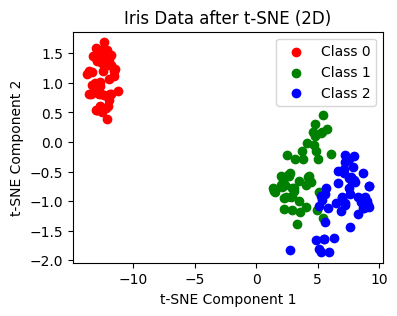

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE and reduce the dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the data after t-SNE in 2D
plt.figure(figsize=(4, 3))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=colors[i], label=f'Class {i}')

plt.title('Iris Data after t-SNE (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [9]:
# Next, we work with the Customer Churn Data set 
# https://www.kaggle.com/datasets/royjafari/customer-churn

In [10]:
import pandas as pd

df = pd.read_csv("Customer_churn.csv")

df.head(3)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.764,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.652,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

In [12]:
# Checking Perplexity vs. Divergence

import numpy as np

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)

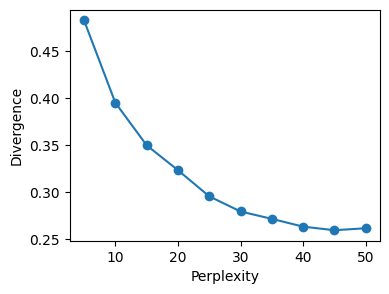

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(4, 3))
plt.plot(np.arange(5, 55, 5), divergence, 'o-')
plt.xlabel('Perplexity')
plt.ylabel('Divergence')
plt.show()

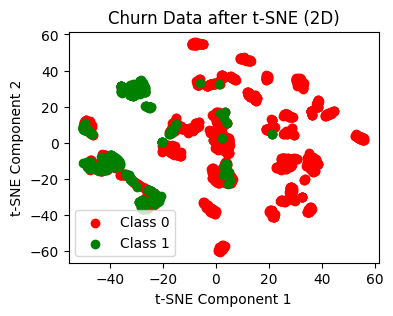

In [14]:
# Apply t-SNE and reduce the dimensionality to 2 components
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Plot the data after t-SNE in 2D
plt.figure(figsize=(4, 3))
colors = ['red', 'green']
for i in range(2):
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], color=colors[i], label=f'Class {i}')

plt.title('Churn Data after t-SNE (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()